# SENTIMENT ANALYSIS USING DECISION TREES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/navyaprasad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/navyaprasad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_csv('reviews-2.csv')
data.head()

,text,summary,rating
0,Not strong enough to run a small 120v vacuum c...,Not strong enough to run a small 120v vacuum c...,3
1,"The leg openings are a little small, but other...",Crap,2
2,Really cute mug. I would have given 5 stars if...,Four Stars,4
3,Well it’s looks and feels okay but it most cer...,Lies!!,2
4,"Very, very thin, you can bend them with you fi...",Thin and bendable :(,1


## DATA PREPROCESSING AND CLEANING

In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if not word in stopwords.words('english')]
    return ' '.join(tokens)

# Preprocess the text data
data['processed_text'] = data['text'].apply(preprocess_text)
data['sentiment'] = data['rating'].apply(lambda x: 1 if x > 3 else 0)



In [ ]:
data.head()

,text,summary,rating,processed_text,sentiment
0,Not strong enough to run a small 120v vacuum c...,Not strong enough to run a small 120v vacuum c...,3,strong enough run small 120v vacuum cleaner cl...,0
1,"The leg openings are a little small, but other...",Crap,2,leg openings little small suit fits nicely hig...,0
2,Really cute mug. I would have given 5 stars if...,Four Stars,4,really cute mug would given 5 stars bit bigger,1
3,Well it’s looks and feels okay but it most cer...,Lies!!,2,well looks feels okay certainly 4 pockets lie ...,0
4,"Very, very thin, you can bend them with you fi...",Thin and bendable :(,1,thin bend fingers problem print small decorati...,0


In [ ]:

# Feature extraction and model pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),  # Convert texts to TF-IDF features
    ('clf', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['sentiment'], test_size=0.2, random_state=42)

## Training Dataset

In [ ]:
train_dataset = pd.DataFrame({'processed_text': X_train, 'sentiment': y_train})

# Display the combined training dataset
train_dataset.head()

,processed_text,sentiment
5894,fantastic 8 road trip gave good reason go tech...,1
3728,horrible quality pocket came unstitched first ...,0
8958,cushions extremely thin felt sitting cushion,0
7671,shirt ok ordered green one sent dark gray blue...,0
5999,cute cups perfect size toddlers preschoolers d...,0


In [ ]:
train_dataset.to_csv('data/train_dt.csv', index=False)

## Testing Dataset

In [ ]:
test_dataset = pd.DataFrame({'processed_text': X_test, 'sentiment': y_test})

# Display the combined training dataset
test_dataset.head()

,processed_text,sentiment
10650,6 lights less month already one work maybe rec...,0
2041,disliked come anything plug works great bought...,0
8668,fairy lights overpriced regular set led christ...,0
1114,cable problems resolution company sent replace...,0
13902,markings people comments believe oem gave 2 st...,0


In [ ]:
test_dataset.to_csv('data/test_dt.csv', index=False)

## Evaluate the model

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='binary')
recall = recall_score(y_test, predictions, average='binary')
f1 = f1_score(y_test, predictions, average='binary')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7125
Precision: 0.6544891640866873
Recall: 0.6409945421467557
F1 Score: 0.647671568627451


## Confusion matrix

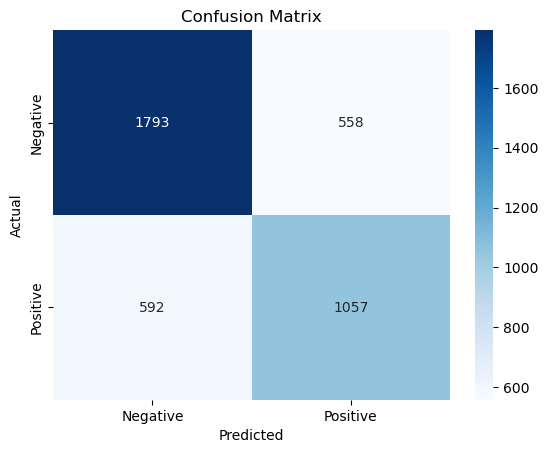

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## Displaying 3 decision trees

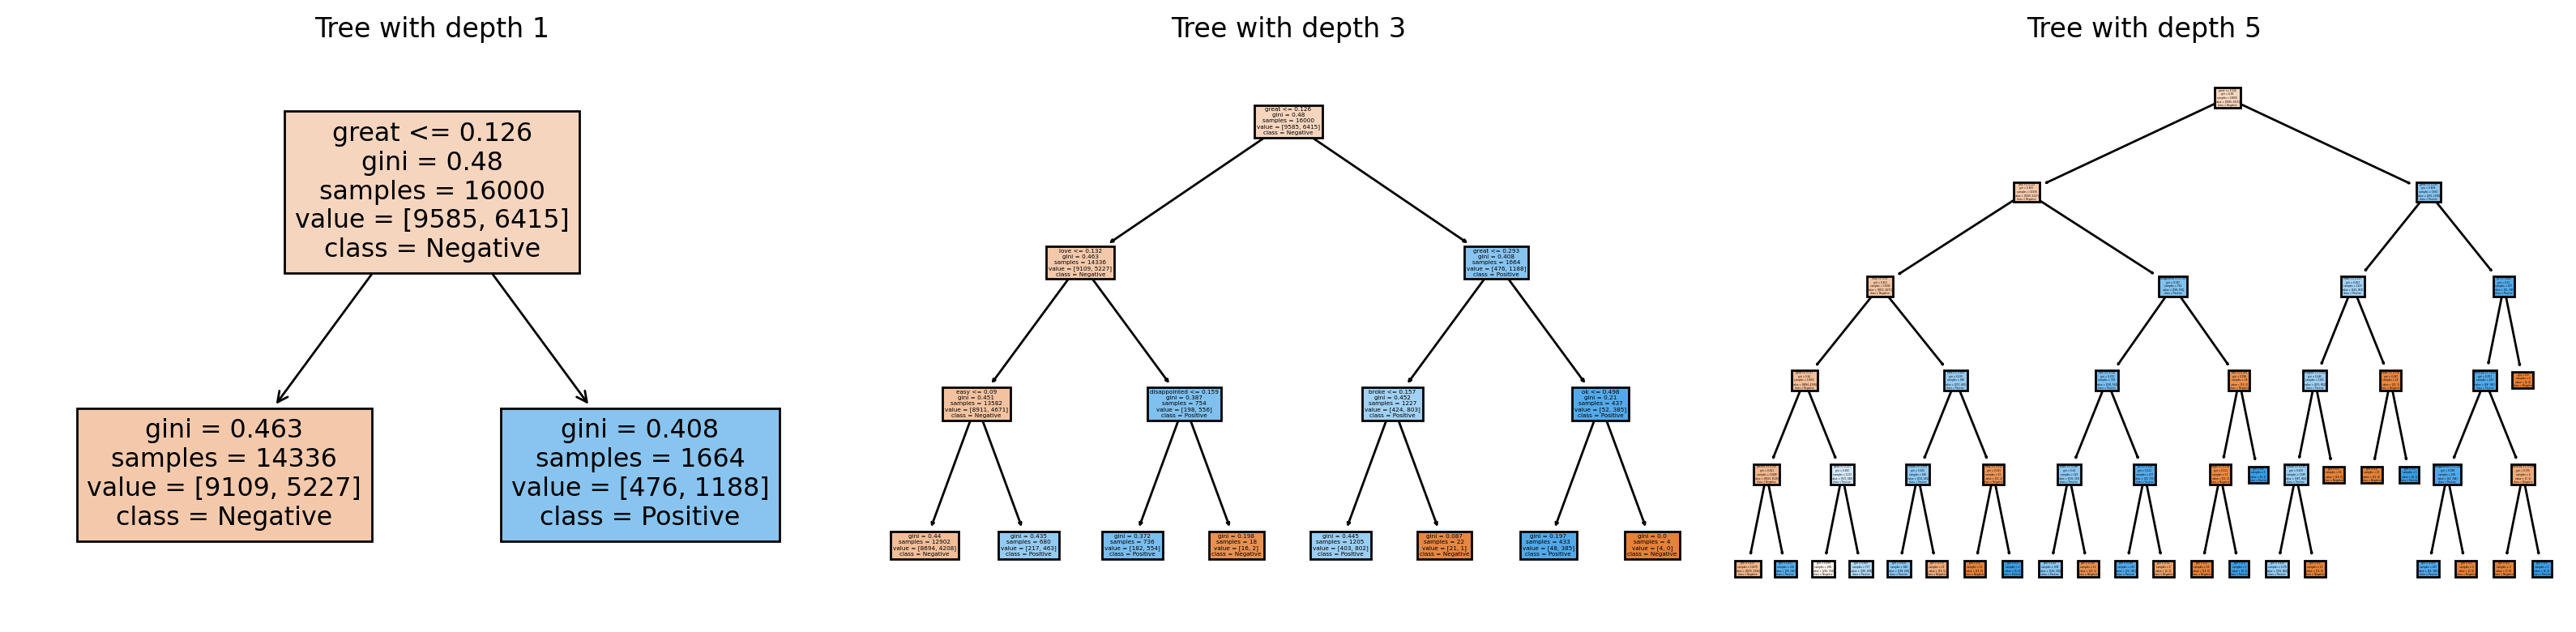

In [ ]:
# Preprocess the text data
data['processed_text'] = data['text'].apply(preprocess_text)

# Vectorize the processed text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['processed_text']).toarray()
y = data['sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train three Decision Trees with different depths
depths = [1, 3, 5]
trees = [DecisionTreeClassifier(max_depth=depth, random_state=42) for depth in depths]
for tree in trees:
    tree.fit(X_train, y_train)

# Visualize the trees
fig, axes = plt.subplots(nrows=1, ncols=len(depths), figsize=(16, 4), dpi=200)
for ax, tree, depth in zip(axes, trees, depths):
    plot_tree(tree, filled=True, ax=ax, feature_names=vectorizer.get_feature_names_out(), class_names=['Negative', 'Positive'])
    ax.set_title(f'Tree with depth {depth}')
plt.tight_layout()
plt.show()